In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the dataset
df = pd.read_csv("/content/traincsv.csv")

<ipython-input-23-92fab5a118af>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/traincsv.csv")


In [24]:
# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB
None
        Customer_ID
count  7.741530e+05
mean   1.038708e+07
std    2.234795e+05
min    1.000000e+07
25%    1.019354e+07
50%    1.038708e+07
75%    1.058062e+07
max    1.077415e+07


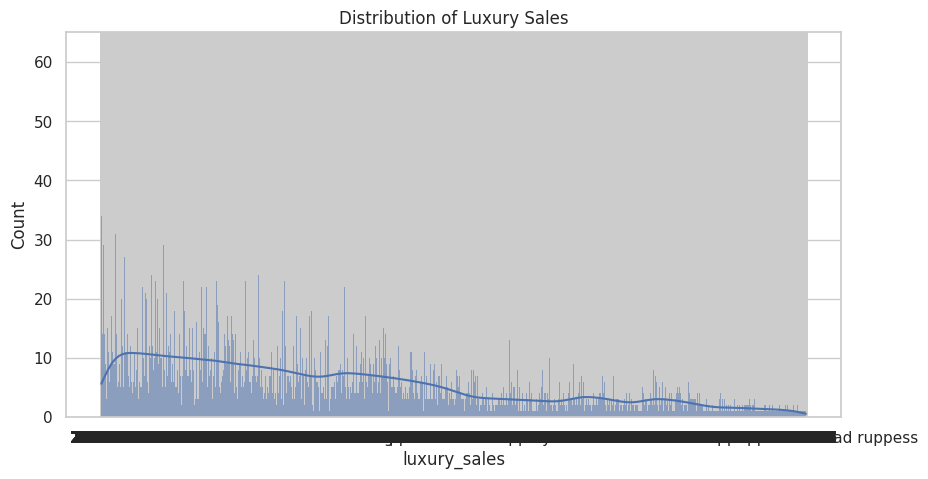

In [25]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['luxury_sales'], bins=20, kde=True)
plt.title("Distribution of Luxury Sales")
plt.show()

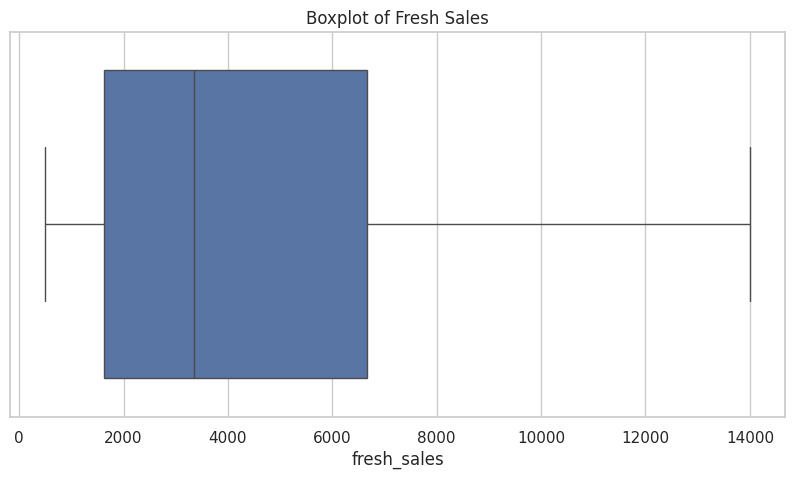

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Convert 'fresh_sales' column to numeric, handling errors
def convert_to_numeric(value):
    try:
        # Attempt to convert directly to numeric
        return pd.to_numeric(value)
    except ValueError:
        # If conversion fails, try removing non-numeric characters and convert
        cleaned_value = ''.join(filter(str.isdigit, str(value)))
        if cleaned_value:
            return pd.to_numeric(cleaned_value)
        else:
            # If no numeric characters found, return NaN
            return float('nan')

df['fresh_sales_numeric'] = df['fresh_sales'].apply(convert_to_numeric)

# Drop rows with NaN values in the new numeric column if necessary
df.dropna(subset=['fresh_sales_numeric'], inplace=True)

# Now create the boxplot using the numeric column
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fresh_sales'])
plt.title("Boxplot of Fresh Sales")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


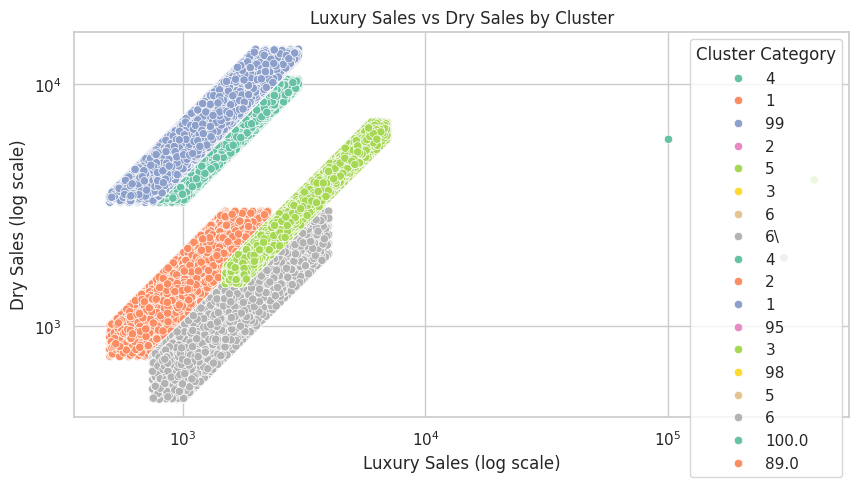

In [39]:
#bivariate analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert sales strings to numeric values
def convert_sales_to_numeric(value):
    word_to_num = {
        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
        'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14,
        'fifteen': 15, 'sixteen': 16, 'seventeen': 17, 'eighteen': 18,
        'nineteen': 19, 'twenty': 20, 'thirty': 30, 'forty': 40,
        'fifty': 50, 'sixty': 60, 'seventy': 70, 'eighty': 80,
        'ninety': 90, 'hundred': 100, 'thousand': 1000,
        'rupees': 1,  # Treat "rupees" as 1 for simplicity
        'hundread': 100  # Correct the typo
    }

    try:
        return pd.to_numeric(value)
    except (ValueError, TypeError):
        words = str(value).lower().replace("and", "").split()
        total, current_num = 0, 0

        for word in words:
            if word in word_to_num:
                num = word_to_num[word]
                if num in {100, 1000}:
                    current_num *= num
                else:
                    current_num += num
            else:
                total += current_num
                current_num = 0

        total += current_num
        return total

# Apply conversion
df['luxury_sales'] = df['luxury_sales'].apply(convert_sales_to_numeric)
df['dry_sales'] = df['dry_sales'].apply(convert_sales_to_numeric)

# Scatter plot
plt.figure(figsize=(10, 5))
# Check if 'cluster_category' exists, if not, try 'cluster_catgeory'
hue_column = 'cluster_category' if 'cluster_category' in df.columns else 'cluster_catgeory'
sns.scatterplot(x=df['luxury_sales'], y=df['dry_sales'], hue=df[hue_column], palette="Set2")

plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')  # Log scale for better visualization
plt.title("Luxury Sales vs Dry Sales by Cluster")
plt.xlabel("Luxury Sales (log scale)")
plt.ylabel("Dry Sales (log scale)")
plt.legend(title="Cluster Category")
plt.show()


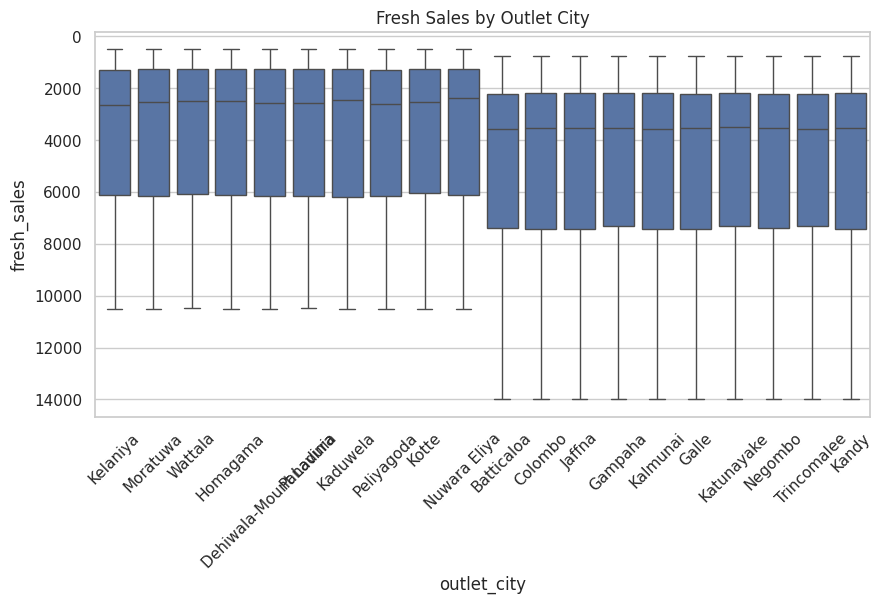

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='outlet_city', y='fresh_sales', data=df)
plt.title("Fresh Sales by Outlet City")
plt.xticks(rotation=45)
plt.show()

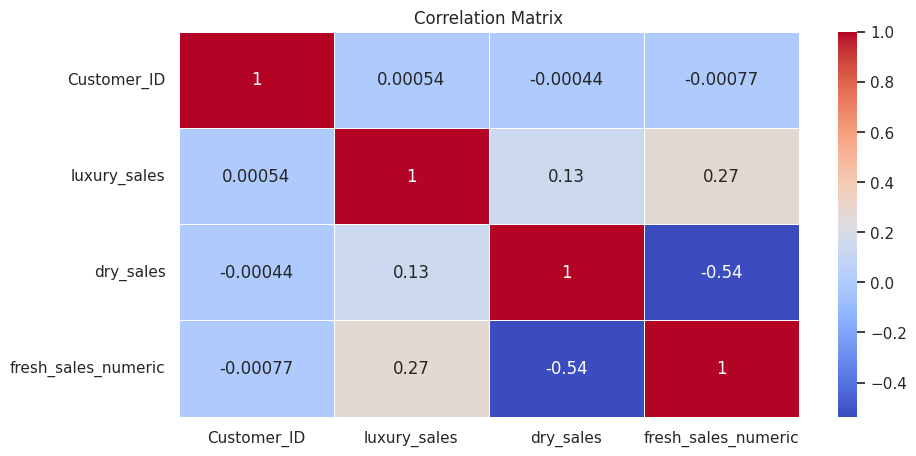

In [36]:
# Multivariate Analysis
plt.figure(figsize=(10, 5))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

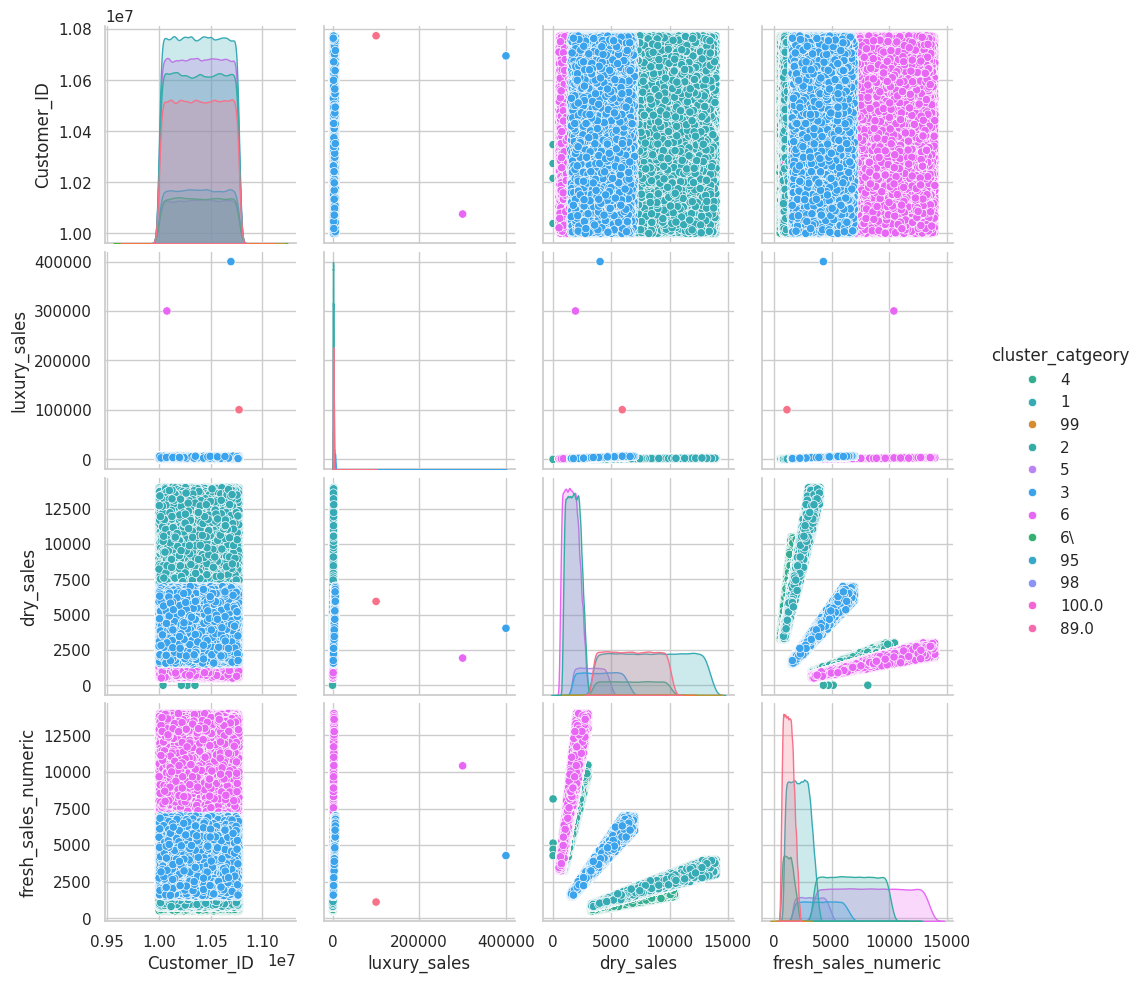

In [37]:
sns.pairplot(df, hue='cluster_catgeory')
plt.show()